<a href="https://colab.research.google.com/github/matthias-k/computational_physics_2024/blob/master/01_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
# ---> Classify breast cancer data set from scikit-learn

In [4]:
# Load data from scikit-learn
data, target = datasets.load_breast_cancer(return_X_y=True)

In [5]:
# Data is a matrix of shape (569, 30)
# The first number refers to the number of cases or samples while the second
# number refers to the number of features from which we try to predict
# breast cancer
# 
# Please see the documentation @ https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
# for more details

# ---> Show dimensions of the data set 
data.shape

(569, 30)

In [6]:
# Target is a binary vector of size (569,) in which each entry is the label of
# each case, either malignant (0) or benign (1).

# ---> Show first twenty values of the target vector
target[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [7]:
# For simplicity we cut the number of features from 30 to just two features
data2 = data[:, :2]

In [8]:
# Excercise 1.1
# Try to find a linear classifier by hand that can classify the dataset 
# as good as possible. Let the classification rule be w1 * f1 + w2 * f2 + w3 > 0.5
# where w1, w2 and w3 are the weights to be learnt and f1, f2 are the features.
# What accuracy can you reach?

# ---> Define test weights by hand 
# ---> Adjust step by step until the highest accuracy is achieved
test_weights = [-10, 3, 100]


In [9]:
# ---> Exercise 1.1
# ---> Find linear classifier to evaluate the dataset
def classifier_scores(data, weights):
    # ---> Calculate the score to classify each data point
    # ---> Classification rule as defined in task: w1 * f1 + w2 * f2 + w3

    # ---> data[x,y] is a way to access data inside a two dimensional array
    # ---> x is the row         (patient)
    # ---> y is the column      (first characteristic)

    classified = [0] * len(data)
    for i in range(len(data)):
        classified[i] = weights[0] * data[i, 0] + weights[1] * data[i, 1] + weights[2]
    return classified


def accuracy(scores, targets, weights):
    # ---> Compares calculated scores with target and evaluates accuracy
    correct = 0
    predictions = []
    # ---> How to classify: score <= 0.5 -> classify as 0 (benign), score > 0.5 -> classify as 1 (malignant)
    for i in range(len(scores)):
        if scores[i] <= 0.5:
            predictions.append(0)
        else:
            predictions.append(1)
    # ---> Count number of correctly calculated predictions
    for i in range(len(scores)):
        if predictions[i] == targets[i]:
            correct += 1
    # ---> Print results
    print("Agreement with prediction in %: " + str(correct / len(scores)))
    print("\nThe straight line equation is: " + str(round(weights[0], 3)) + "x + " + 
          str(round(weights[1], 3)) + "y + " + str(round(weights[2], 3)))
    return correct / len(scores)

In [10]:
# Execise 1.1a (optional but helpful)
# Create a 2d scatter plot with all data points and visualize the model
# predictions, e.g. by coloring them with matplotlib's `fill` method

Agreement with prediction in %: 0.8066783831282952

The straight line equation is: -10x + 3y + 100


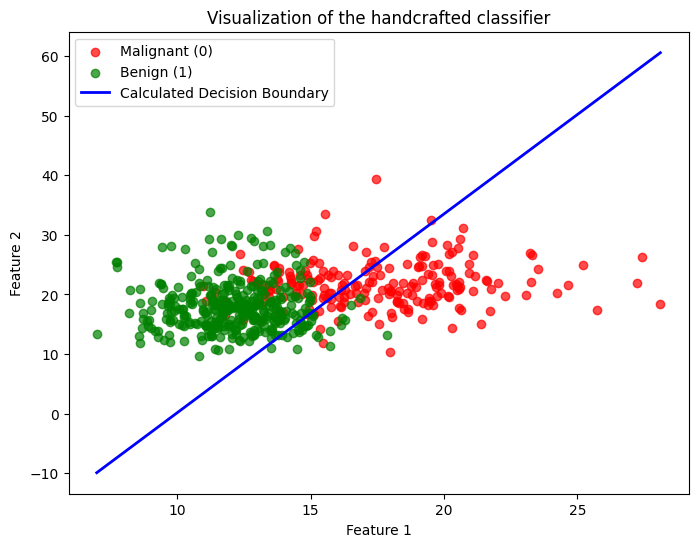

In [11]:
# ---> Exercise 1.1a
# ---> Create 2d scatter plot
# ---> Calculate scores with test weights
test_scores = classifier_scores(data, test_weights)
# ---> Calculate corresponding accuracy
test_accuracy = accuracy(test_scores, target, test_weights)

# ---> Calculate border between both classes with equation from task
# ---> y = (0.5 - w0 * x - w2) / w1
x_values = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 100)
y_values = (0.5 - test_weights[0] * x_values - test_weights[2]) / test_weights[1]

# Divide the data into the classes 
class0 = data[target == 0]
class1 = data[target == 1]

# ---> Plot data points in different color according to classification
# ---> red  = malignant
# --- green = benign
plt.figure(figsize=(8, 6))
plt.scatter(class0[:, 0], class0[:, 1], color='red', label='Malignant (0)', alpha=0.7)
plt.scatter(class1[:, 0], class1[:, 1], color='green', label='Benign (1)', alpha=0.7)
# ---> Plot claculated boundary between classes
plt.plot(x_values, y_values, label='Calculated Decision Boundary', color='blue', linewidth=2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Visualization of the handcrafted classifier")
plt.legend()
plt.show()

In [12]:
# Excercise 1.2
# Learn the optimal parameters automatically using gradient descent. For the
# loss function use a simple squared loss (t - tp)**2 where t is the target
# label (either 0 or 1) and tp = w1 * f1 + w2 * f2 + w3 is the predicted label.
# What accuracy can you reach? Why is this loss function problematic? Do you
# have ideas for a a better alternative?

Epoch 0 Loss: 0.32652179171168266
Epoch 100 Loss: 0.29267177976176006
Epoch 200 Loss: 0.28962496228022117
Epoch 300 Loss: 0.2869877349778446
Epoch 400 Loss: 0.284394135209769
Epoch 500 Loss: 0.28183679788246946
Epoch 600 Loss: 0.2793150910525689
Epoch 700 Loss: 0.27682851594905955
Epoch 800 Loss: 0.27437658308242774
Epoch 900 Loss: 0.2719588098263393

Learned Weights: [np.float64(-0.02880913307202926), np.float64(0.04134976425706772), np.float64(0.1599170947440837)]
Agreement with prediction in %: 0.5131810193321616

The straight line equation is: -0.029x + 0.041y + 0.16


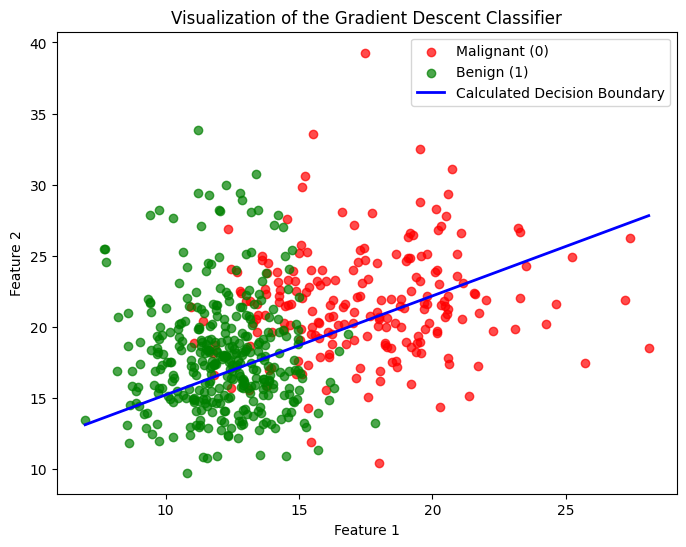

In [13]:
def mean_squared_error(scores, targets):
    # ---> Calculate the mean squared error between scores and targets
    scores = np.array(scores)
    targets = np.array(targets)
    return np.mean((targets - scores) ** 2)

# ---> Exercise 1.2: Learn optimal parameters automatically using gradient descent
# ---> Loss function: (t - tp)**2, where tp = w1*f1 + w2*f2 + w3

def gradient_descent(d, t):
    # ---> Set parameters: 1000 epochs, learning rate 0.001
    epochs = 1000
    learning_rate = 0.001
    # ---> Initialize weights
    # ---> w = [weight1, weight2, bias]
    w = [0, 0, 0] 
    # ---> Number of data points
    N = len(d) 
    
    for epoch in range(epochs):
        # ---> Initialize gradient values for this epoch
        dw = [0, 0, 0]
        for j in range(N):
            # ---> Calculate the score (tp) for datapoint j
            pred = w[0] * d[j, 0] + w[1] * d[j, 1] + w[2]
            # ---> Calculate error: (t - tp)
            error = t[j] - pred
            # ---> Compute partial derivatives of the squared loss:
            # ---> dL/dw1 = -2 * error * f1, dL/dw2 = -2 * error * f2, dL/dw3 = -2 * error
            dw[0] += -2 * error * d[j, 0] / N
            dw[1] += -2 * error * d[j, 1] / N
            dw[2] += -2 * error / N
        # ---> Update the weights using the gradient descent rule
        for i in range(3):
            w[i] -= learning_rate * dw[i]
        # ---> Calculate epoch loss (aggregated error after complete passage of one epoch)
        # ---> Should the epoch loss decline with time (more epochs) passed, then that would indicate that the model is indeed learning and improving
        if epoch % 100 == 0:
            current_scores = classifier_scores(d, w)
            loss = mean_squared_error(current_scores, t)
            print("Epoch", epoch, "Loss:", loss)
    return w

# ---> Run gradient descent to learn optimal weights
learned_weights = gradient_descent(data, target)
print("\nLearned Weights:", learned_weights)

# ---> Evaluate the classifier with learned weights
gd_scores = classifier_scores(data, learned_weights)
gd_accuracy = accuracy(gd_scores, target, learned_weights)

# ---> Visualization (similar to Exercise 1.1a)
x_values = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 100)
y_values = (0.5 - learned_weights[0] * x_values - learned_weights[2]) / learned_weights[1]

# ---> Divide the data into the classes
class0 = data[target == 0]
class1 = data[target == 1]

plt.figure(figsize=(8, 6))
# ---> Plot data points: red for malignant (0), green for benign (1)
plt.scatter(class0[:, 0], class0[:, 1], color='red', label='Malignant (0)', alpha=0.7)
plt.scatter(class1[:, 0], class1[:, 1], color='green', label='Benign (1)', alpha=0.7)
# ---> Plot the calculated decision boundary
plt.plot(x_values, y_values, label='Calculated Decision Boundary', color='blue', linewidth=2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Visualization of the Gradient Descent Classifier")
plt.legend()
plt.show()

In [14]:
# ---> Accuracy with gradient descent is way worse than the one achieved by hand for 1.000 epochs.
# ---> 81% accuracy with handcrafted classifier
# ---> 51% accuracy with gradient descent
# ---> However, when increasing the number of epochs to 10.000, the accuracy for gradient descent increases to 83%.
# ---> Increasing the epochs further (to 50.000) has only minor effects on the accuracy (88%) in comparison to the computing time.
# ---> The quadratic loss function could be less suitable becaues it uses a continuous error evaluation, but the classifier has only two target values.
# ---> Learning rates could also be problematic. If the error is very small/large, the model learns slower/faster than anticipated and might converge to 0.5 instead of 0 or 1.
# ---> Checked different learning rates:
# ---> Rate = 0.001  -> 51%
# ---> Rate = 0.0015 -> 53%
# ---> Rate = 0.002  -> 37%
# ---> Rate = 0.004  -> error
# ---> Rate = 0.0001 -> 44%
# ---> Binary Cross Entropy (log-loss) could be a better alternative as it forces a clear decision and punishes uncertain predictions (0.49/0.51 in this case) harder.

